<a href="https://colab.research.google.com/github/jeppchumba/Tweets-Classification-ML/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#uploading dataset into colab
from google.colab import files
uploaded = files.upload()

Saving Unclean data.csv to Unclean data.csv


In [ ]:
import pandas as pd
tweets_df=pd.read_csv('Unclean data.csv')
tweets_df

,tweets
0,Get fucking real dude.
1,She is as dirty as they come and that crook ...
2,why did you fuck it up. I could do it all day...
3,Dude they dont finish enclosing the fucking s...
4,WTF are you talking about Men? No men thats n...
...,...
19996,I dont. But what is complaining about it goi...
19997,Bahah yeah i&;m totally just gonna&; get pis...
19998,hahahahaha >:) im evil mwahahahahahahahahaha
19999,What&;s something unique about Ohio? :)


Average length of tweets  68
Average word counts of tweets 13


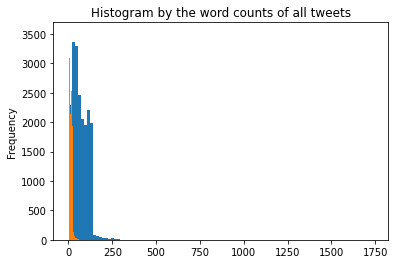

In [ ]:
#calculating average tweet length and word count
import numpy as np
tweets_df['text_len'] = tweets_df['tweets'].astype(str).apply(len)
tweets_df['text_word_count'] = tweets_df['tweets'].apply(lambda x: len(str(x).split()))
print("Average length of tweets ", round(np.mean(tweets_df['text_len'])))
print("Average word counts of tweets", round(np.mean(tweets_df['text_word_count'])))
tweets_df['text_len'].plot(bins = 100, kind = 'hist',title = 'Histogram by length of tweets');
tweets_df['text_word_count'].plot(bins = 100, kind = 'hist', title = 'Histogram by the word counts of all tweets')

In [ ]:
#Sentiment Analysis using Vader Library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
for index, row in tweets_df['tweets'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    if score['neg'] > score['pos']:
        tweets_df.loc[index, "Sentiment"] = "negative"
    elif score['pos'] > score['neg']:
        tweets_df.loc[index, "Sentiment"] = "positive"
    else:
        tweets_df.loc[index, "Sentiment"] = "neutral"
        
    tweets_df.loc[index, 'neg'] = score['neg']
    tweets_df.loc[index, 'neu'] = score['neu']
    tweets_df.loc[index, 'pos'] = score['pos']
    tweets_df.loc[index, 'compound'] = score['compound']

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
tweets_df

,tweets,text_len,text_word_count,Sentiment,neg,neu,pos,compound
0,Get fucking real dude.,23,4,neutral,0.000,1.000,0.000,0.0000
1,She is as dirty as they come and that crook ...,130,25,positive,0.100,0.728,0.172,0.2648
2,why did you fuck it up. I could do it all day...,130,30,negative,0.115,0.885,0.000,-0.5423
3,Dude they dont finish enclosing the fucking s...,126,21,negative,0.256,0.744,0.000,-0.7334
4,WTF are you talking about Men? No men thats n...,75,15,negative,0.359,0.641,0.000,-0.7739
...,...,...,...,...,...,...,...,...
19996,I dont. But what is complaining about it goi...,55,11,negative,0.167,0.833,0.000,-0.2023
19997,Bahah yeah i&;m totally just gonna&; get pis...,128,26,positive,0.133,0.632,0.235,0.3016
19998,hahahahaha >:) im evil mwahahahahahahahahaha,46,5,negative,0.500,0.341,0.159,-0.6124
19999,What&;s something unique about Ohio? :),40,6,positive,0.000,0.625,0.375,0.4588


In [ ]:
tweets_df.to_csv('SentimentAnalysis_manual.csv', encoding='utf-8', index=False)